# DS4300 P02 - RAG Indexing Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('../data/experiment_data/experiment_results.csv')
df.head()

,embedding_model,llm_model,db_type,query,query_id,response,time_taken_to_index,mem_taken_to_index,time_taken_to_rag,mem_taken_to_rag
0,bge-large,tinyllama:latest,ChromaConnector,"What are document-based databases, and give ex...",5630358389665185459,Document-based databases are a type of databas...,0.076958,0.265625,5.587342,-7.070312
1,bge-large,deepseek-r1:1.5b,ChromaConnector,"What are document-based databases, and give ex...",5630358389665185459,"<think>\nOkay, so I'm trying to understand wha...",0.029052,0.207031,23.586972,0.210938
2,bge-large,gemma3:latest,ChromaConnector,"What are document-based databases, and give ex...",5630358389665185459,Document-based databases are databases that st...,0.028503,0.152344,9.583311,-23.910156
3,snowflake-arctic-embed2,tinyllama:latest,ChromaConnector,"What are document-based databases, and give ex...",5630358389665185459,Document-based databases are a type of non-rel...,0.037987,0.210938,3.355426,0.113281
4,snowflake-arctic-embed2,deepseek-r1:1.5b,ChromaConnector,"What are document-based databases, and give ex...",5630358389665185459,"<think>\nOkay, so I'm trying to understand wha...",0.040575,0.039062,27.301835,0.109375


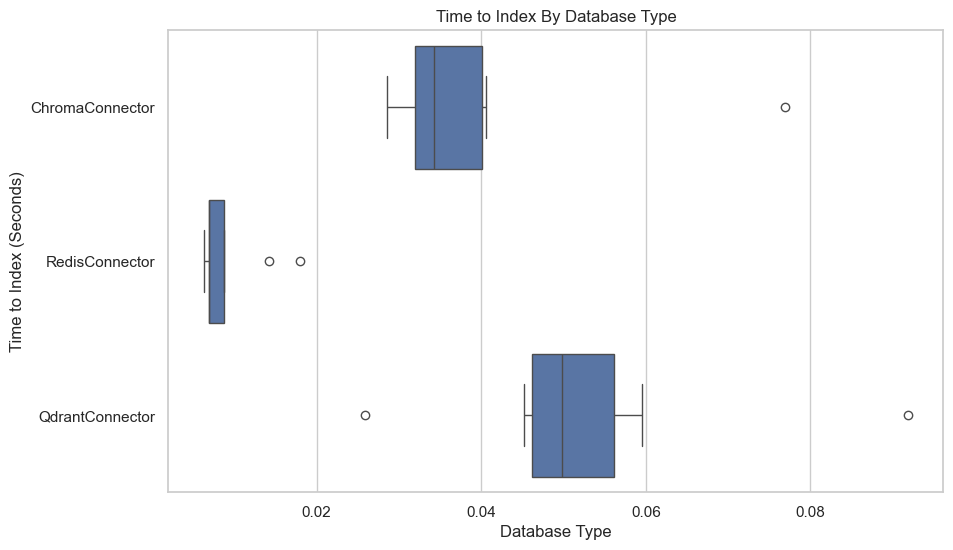

In [13]:
# Boxplot for time to index by database type
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(y='db_type', x='time_taken_to_index', data=df)
plt.title("Time to Index By Database Type")
plt.xlabel("Database Type")
plt.ylabel("Time to Index (Seconds)")
plt.show()

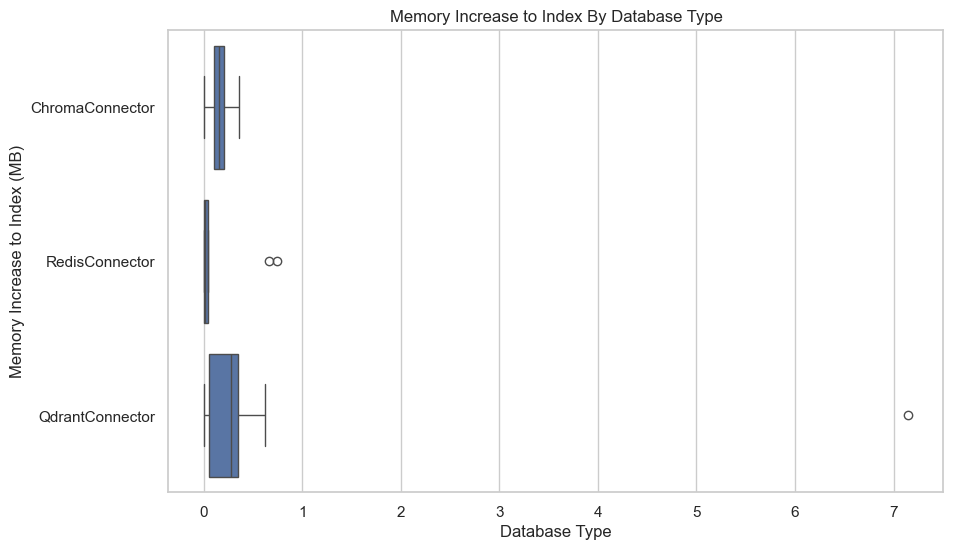

In [14]:
# Boxplot for memory increase to index by database type
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(y='db_type', x='mem_taken_to_index', data=df)
plt.title("Memory Increase to Index By Database Type")
plt.xlabel("Database Type")
plt.ylabel("Memory Increase to Index (MB)")
plt.show()

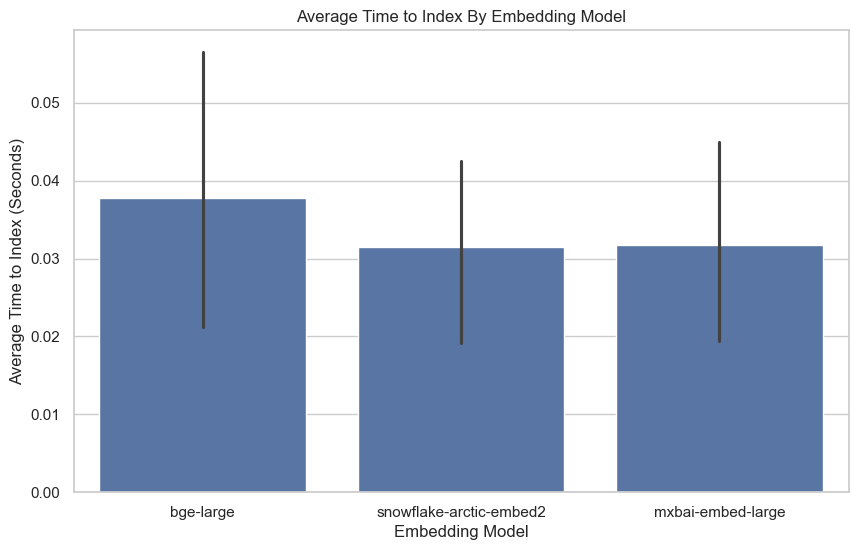

In [15]:
# Average time by embedding model type
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='embedding_model', y='time_taken_to_index', data=df)
plt.title("Average Time to Index By Embedding Model")
plt.xlabel("Embedding Model")
plt.ylabel("Average Time to Index (Seconds)")
plt.show()

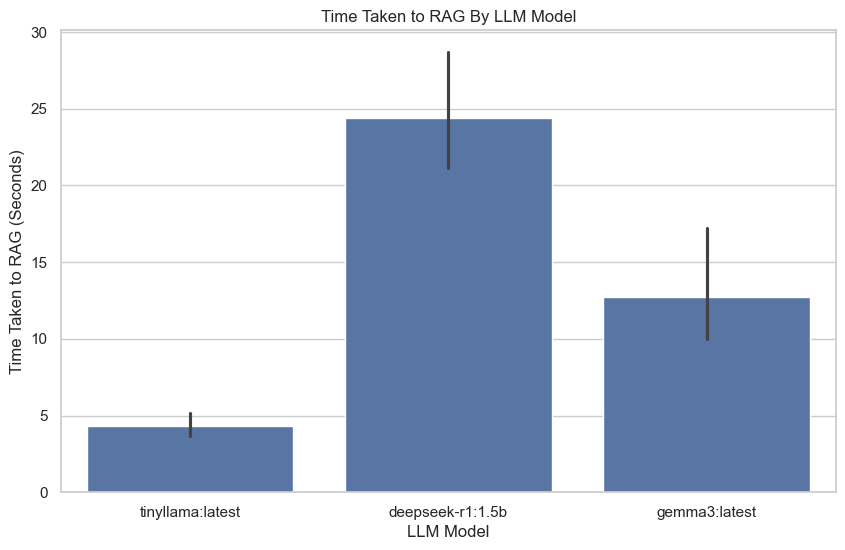

In [16]:
# Time taken to RAG by LLM model
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='llm_model', y='time_taken_to_rag', data=df)
plt.title("Time Taken to RAG By LLM Model")
plt.xlabel("LLM Model")
plt.ylabel("Time Taken to RAG (Seconds)")
plt.show()

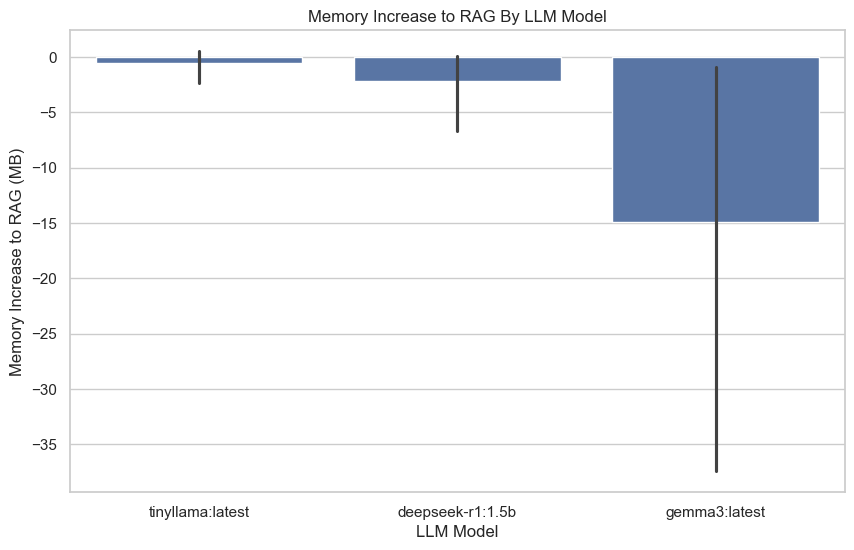

In [17]:
# Memory increase to RAG by LLM model
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='llm_model', y='mem_taken_to_rag', data=df)
plt.title("Memory Increase to RAG By LLM Model")
plt.xlabel("LLM Model")
plt.ylabel("Memory Increase to RAG (MB)")
plt.show()